In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\agrvi\AppData\Local\Temp\ipykernel_26432\3676753470.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)
# print(len(gpus))
# print(tf.config.list_physical_devices('GPU'))

In [3]:
data_dir="D:\koding\codes\Machine Learning\projects\CNN happy_sad face recognition\dataset1"

In [4]:
images_exts=['jpeg','jpg','bmp','png']
print(os.listdir(data_dir))

['happy', 'sad']


In [5]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg',
 '1_617fd1e2590c2.jpg',
 '2560px-Happy_People.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'ce529eea8c0ca9987656fa90474563d6.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'compassion.jpg',
 'Employee_Happiness.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyI

In [6]:
#Cleaning the dataset and compiling the files of the required type
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)  #trying to read the image
            tip=imghdr.what(image_path)  #this will tell us the type of image 
            if tip not in images_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue wirh image{}'.format(image_path))


In [7]:
#testing the above for a given exapmle
img=cv2.imread(os.path.join(data_dir,'happy','smile.woman_.jpg'))
img

array([[[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       ...,

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]]

In [8]:
print(img.shape,type(img))

(3844, 5125, 3) <class 'numpy.ndarray'>


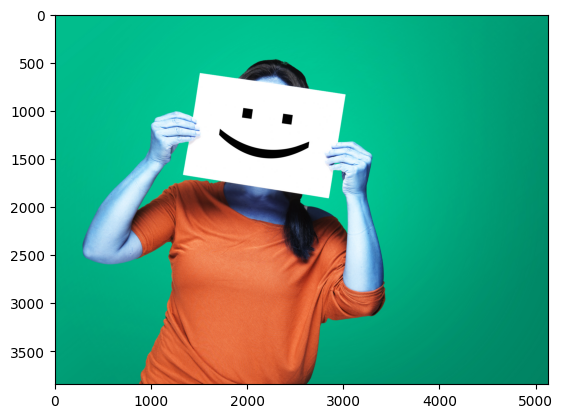

In [9]:
# OpenCV reads images in BGR (Blue, Green, Red) format.
# Matplotlib expects images in RGB (Red, Green, Blue) format.
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #Converting BGR -> RGB.
plt.imshow(img)

**Loading data and trying to create a pipeline of data**

In [10]:
#tf.data.Dataset.list_files
import numpy as np 

In [11]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

Found 180 files belonging to 2 classes.


In [12]:
# Images represented as the numpy array
len(batch) 
#this means that there is two part to the dataset, one is images and the other one is the labels 
print(batch[0].shape)
# this 256, 256 is the image shape and 32 is the batch size, all of this is decided by image_dataset_from_directory
# we can also change all of this 
# we can do this by :
# tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=15,image_size=(128,128))

(32, 256, 256, 3)


In [13]:
batch[1]
# 1 either reprenst happy or sad and same goes for 0

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

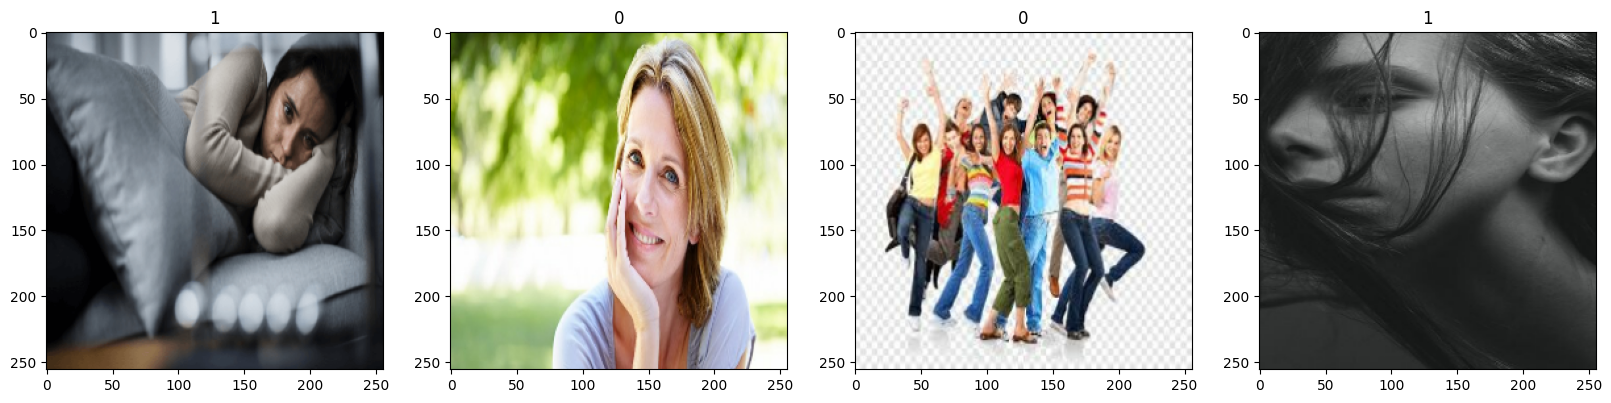

In [14]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# this proves that 1 is assigned to sad and 0 is assigned to happy

In [15]:
scaled=batch[0]/255
scaled.max()

1.0

**NOW WE NEED TO PREPROCESS**

In [16]:
data=data.map(lambda x,y:(x/255 ,y))
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

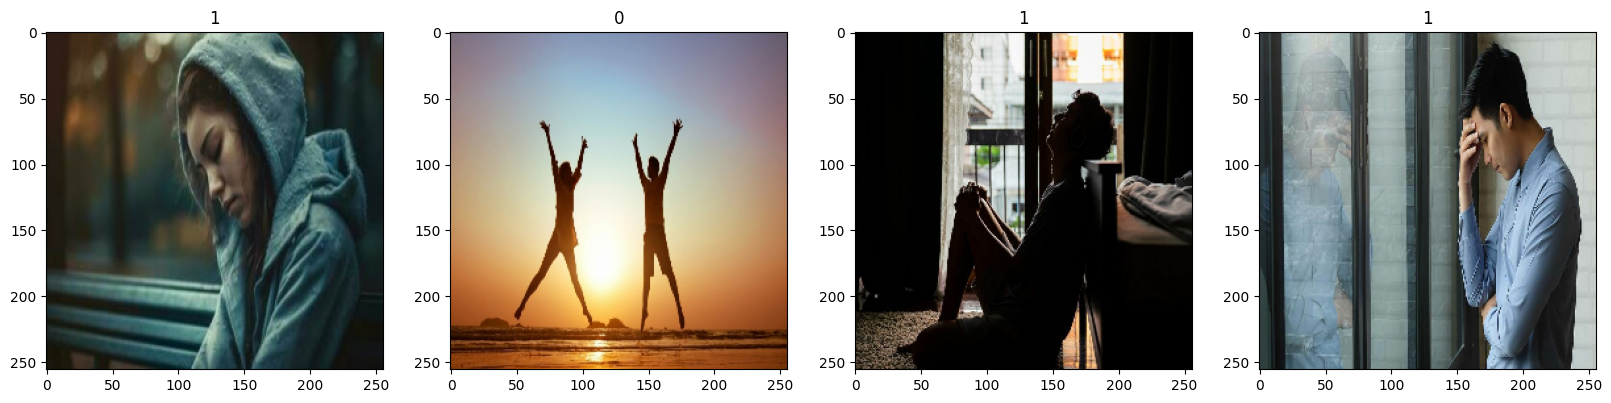

In [17]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [18]:
# split data
train_size=int(len(data)*.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)+1

In [19]:
train =data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

**Building the Deep Learning**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [21]:
model=Sequential()

In [22]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

# this means that our model will have 16 filters and will have a 3x3 pixel filter movement with movement of 1 pixel per movement
# input will be 256x256 into 3 channels deep 

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\agrvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**TRAIN**

In [25]:
logdir='C:\\Users\\agrvi\\Downloads\\log'

In [26]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step - accuracy: 0.5667 - loss: 1.5930 - val_accuracy: 0.4423 - val_loss: 0.7871
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 556ms/step - accuracy: 0.3917 - loss: 0.7816 - val_accuracy: 0.4423 - val_loss: 0.6916
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - accuracy: 0.5229 - loss: 0.6819 - val_accuracy: 0.8269 - val_loss: 0.6133
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - accuracy: 0.7083 - loss: 0.6103 - val_accuracy: 0.8077 - val_loss: 0.5252
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - accuracy: 0.7854 - loss: 0.5377 - val_accuracy: 0.7115 - val_loss: 0.4865
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 595ms/step - accuracy: 0.7281 - loss: 0.4993 - val_accuracy: 0.9038 - val_loss: 0.4491
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - accuracy: 0.8719 - loss: 0.4106 - val_accuracy: 0.8654 - val_loss: 0.3641
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - accuracy: 0.9073 - loss: 0.3196 - val_accuracy: 0.9615 - val_loss:

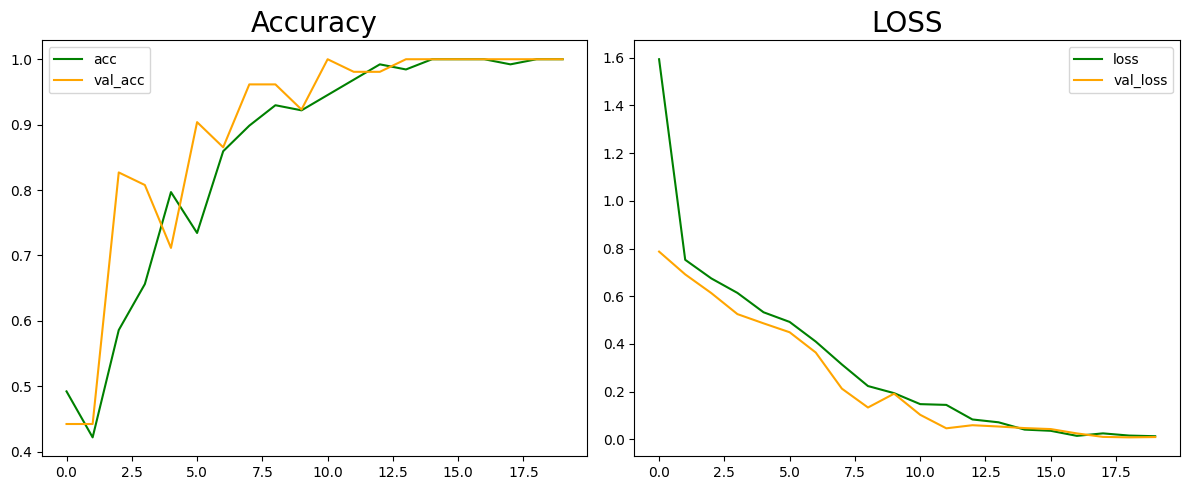

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Plot accuracy
axs[0].plot(hist.history['accuracy'], color='green', label='acc')
axs[0].plot(hist.history['val_accuracy'], color='orange', label='val_acc')
axs[0].set_title('Accuracy', fontsize=20)
axs[0].legend(loc='upper left')

# Plot loss
axs[1].plot(hist.history['loss'], color='green', label='loss')
axs[1].plot(hist.history['val_loss'], color='orange', label='val_loss')
axs[1].set_title('LOSS', fontsize=20)
axs[1].legend(loc='upper right')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Testing the model 

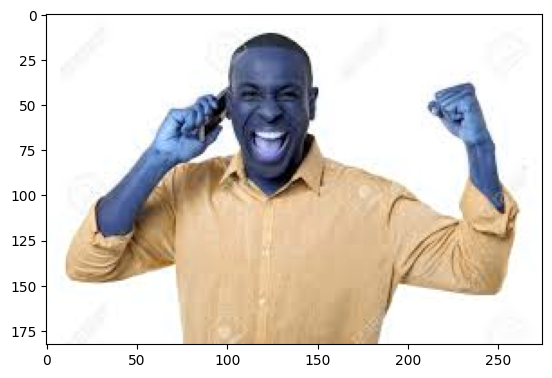

In [34]:
img = cv2.imread(r"C:\Users\agrvi\Downloads\khush_kalu_munda.jpeg")
plt.imshow(img)
plt.show()

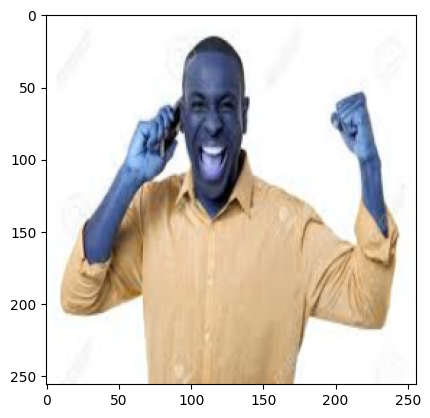

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.00861415]], dtype=float32)

In [37]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Let's save this Shiz!

In [38]:
save_path = r"D:\koding\codes\Machine Learning\projects\CNN happy_sad face recognition\final_cnn_model.h5"
model.save(save_path)

In [39]:
model_save_path = r"D:\koding\codes\Machine Learning\projects\CNN happy_sad face recognition\final_cnn_model.h5"
model2 = tf.keras.models.load_model(model_save_path)

In [40]:
model2.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.00861415]], dtype=float32)